# A simple regression problem using KNN functions...
* Our task is predict House Price Index

## 1. Data to test:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df_dict = {'Age':[25,35,45,20,35,52,23,40,60,48,33], 
           'Loan':[40000, 60000, 80000, 20000, 120000, 18000, 95000, 62000, 100000, 220000, 150000], 
           'HPindex':[135,256,231,267,139,150,127,216,139,250, 264]}
test_dict = {'Age': [42, 30], 'Loan':[142000, 50000]}

In [3]:
df  = pd.DataFrame.from_dict(df_dict)
X_test = pd.DataFrame.from_dict(test_dict)
df.head()

,Age,Loan,HPindex
0,25,40000,135
1,35,60000,256
2,45,80000,231
3,20,20000,267
4,35,120000,139


## 2. Transforming the data:

In [4]:
# Our dataset will be called of X_train
# and after do the algorithm we'll test in two cases.
y_train = df.iloc[0:,2:]
X_train_normalized = df.iloc[0:,:2]
X_train_unnormalized = df.iloc[0:,:2]
X_train_standardized = df.iloc[0:,:2]

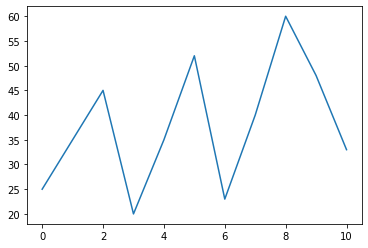

In [5]:
X_train_unnormalized['Age'].plot();

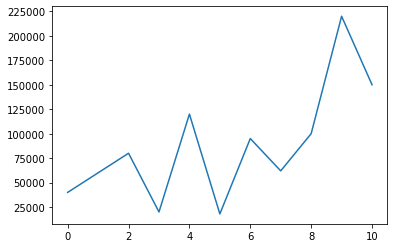

In [6]:
X_train_unnormalized['Loan'].plot();

### 2.1 Standardization:

In [7]:
X_train_standardized[['Age', 'Loan']] = StandardScaler().fit_transform(X_train_standardized[['Age', 'Loan']])

In [8]:
X_train_standardized

,Age,Loan
0,-1.064947,-0.836184
1,-0.234137,-0.485783
2,0.596673,-0.135382
3,-1.480352,-1.186586
4,-0.234137,0.565420
5,1.178240,-1.221626
6,-1.231109,0.127419
7,0.181268,-0.450743
8,1.842888,0.215019
9,0.845916,2.317426


### 2.2 Normalization:

In [9]:
X_train_normalized['Age'] = (X_train_normalized['Age'] - X_train_normalized['Age'].min()) / (X_train_normalized['Age'].max() - X_train_normalized['Age'].min())
X_train_normalized['Loan'] = (X_train_normalized['Loan'] - X_train_normalized['Loan'].min()) / (X_train_normalized['Loan'].max() - X_train_normalized['Loan'].min())    

In [10]:
X_train_normalized

,Age,Loan
0,0.125,0.108911
1,0.375,0.207921
2,0.625,0.306931
3,0.000,0.009901
4,0.375,0.504950
5,0.800,0.000000
6,0.075,0.381188
7,0.500,0.217822
8,1.000,0.405941
9,0.700,1.000000


## 3. Building the algorithm:

### 3.1 - Measuring euclidean distances

In [11]:
def euclidean_distances(X, X_row):
    X_ = (X - X_row) ** 2
    return np.sum(X_, axis=1) ** 0.5

### - Testing:

In [12]:
point_to_test = np.array(X_train_normalized.iloc[:1,:2])
euclidean_distances(X_train_normalized, point_to_test)

0     0.000000
1     0.268892
2     0.537784
3     0.159461
4     0.468345
5     0.683730
6     0.276830
7     0.390495
8     0.924041
9     1.060502
10    0.580120
dtype: float64

### 3.2 - Getting the nearest neighbors

In [13]:
def get_neighbors(X_train, test_row, k):
    distances = euclidean_distances(X_train, test_row)
    idx_sort = np.argsort(a = distances)
    return idx_sort.to_numpy()[1:k+1]

### - Testing:

In [14]:
point = X_train_normalized.iloc[1:2,:]
get_neighbors(X_train_normalized, point, 3)

array([1, 2, 3])

### 3.3 - Predicting the regression:

In [15]:
def predict_regressor(X, y, test_row, k, metric, floor):
    idx_sort = get_neighbors(X, test_row, k)
    output_values = y.to_numpy()[idx_sort]
    if metric == 1:
        value = (np.median(output_values) + np.mean(output_values))/2
    elif metric == 2:
        value = (np.median(output_values) + np.mean(output_values) + np.mean(output_values))/3
    elif metric == 3:
        value = (np.min(output_values) + np.max(output_values))/2
    elif metric == 4:
        value = (np.min(output_values) + np.max(output_values) + np.mean(output_values))/3
    elif metric == 5:
        value = (np.min(output_values) + np.max(output_values) + np.mean(output_values) + np.median(output_values))/4
    elif metric == 6:
        value = (np.min(output_values) + np.max(output_values) + np.median(output_values))/3
                 
    if floor == True:
        value = round(value - 0.5)
    if floor == False:
        value = round(value + 0.5)
    
    return value

### - Testing the regressor function with different metrics:

In [16]:
print('Test 01: NORMALIZED')
point1 = np.array(X_train_normalized.iloc[3:4,:])
for i in range(1,7):
    result = predict_regressor(X = X_train_normalized, y = y_train, test_row = point1,k = 5, metric = i, floor = True)
    print(result)
    
print('\n','Test 02: STANDARDIZED')
point2 = np.array(X_train_standardized.iloc[3:4,:])
for i in range(1,7):
    result_2 = predict_regressor(X = X_train_standardized, y = y_train, test_row = point2,k = 5, metric = i, floor = True)
    print(result_2)

print('\n','Test 03: UNNORMALIZED')
point3 = np.array(X_train_unnormalized.iloc[3:4,:])
for i in range(1,7):
    result_3 = predict_regressor(X = X_train_standardized, y = y_train, test_row = point3,k = 5, metric = i, floor = True)
    print(result_3)

Test 01: NORMALIZED
156
162
191
185
174
174

 Test 02: STANDARDIZED
156
162
191
185
174
174

 Test 03: UNNORMALIZED
159
166
195
190
177
176


In [39]:
X_train_normalized

,Age,Loan
0,0.125,0.108911
1,0.375,0.207921
2,0.625,0.306931
3,0.000,0.009901
4,0.375,0.504950
5,0.800,0.000000
6,0.075,0.381188
7,0.500,0.217822
8,1.000,0.405941
9,0.700,1.000000


In [60]:
for j in range(1,7):
    print('Metric',j)
    for i in range(1,len(X_train_normalized)):
        normalized_array = np.array(X_train_normalized.iloc[i-1:i,:])
        predicted_n = predict_regressor(X = X_train_normalized, y = y_train, test_row = normalized_array,k = 5, metric = j, floor = True)
        print(predicted_n)
    print('\n')

Metric 1
208
154
164
156
224
206
234
166
207
206


Metric 2
206
159
170
162
222
202
226
171
204
203


Metric 3
196
178
197
191
195
197
200
195
197
201


Metric 4
198
175
191
185
203
197
204
191
197
200


Metric 5
202
166
181
174
210
201
217
180
202
204


Metric 6
203
165
181
174
207
203
219
180
203
206




In [17]:
y_train

,HPindex
0,135
1,256
2,231
3,267
4,139
5,150
6,127
7,216
8,139
9,250


## 4 - Predicting a new y_test:

In [18]:
X_test_normalized = X_test.copy()
X_test_standardized = X_test.copy()
X_test_unnormalized = X_test.copy()

In [19]:
# Applying the same normalization

X_test_normalized['Age'] = (X_test_normalized['Age'] - X_test_normalized['Age'].min()) / (X_test_normalized['Age'].max() - X_test_normalized['Age'].min())
X_test_normalized['Loan'] = (X_test_normalized['Loan'] - X_test_normalized['Loan'].min()) / (X_test_normalized['Loan'].max() - X_test_normalized['Loan'].min()) 

# Applying the same standardization

X_test_standardized[['Age', 'Loan']] = StandardScaler().fit_transform(X_test_standardized[['Age', 'Loan']])

In [20]:
X_test_normalized

,Age,Loan
0,1.0,1.0
1,0.0,0.0


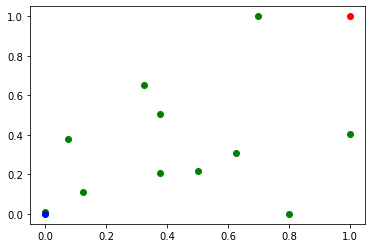

In [21]:
plt.scatter(X_train_normalized.iloc[:,:1], X_train_normalized.iloc[:,1:], c = 'green')
plt.scatter(X_test_normalized.iloc[:1,:1], X_test_normalized.iloc[:1,1:], c = 'red')
plt.scatter(X_test_normalized.iloc[1:,:1], X_test_normalized.iloc[1:,1:], c = 'blue')
plt.show()

In [22]:
X_test_standardized

,Age,Loan
0,1.0,1.0
1,-1.0,-1.0


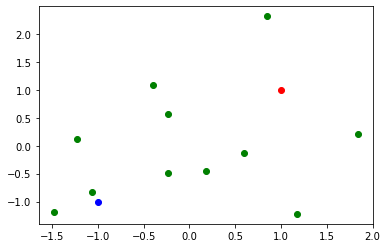

In [23]:
plt.scatter(X_train_standardized.iloc[:,:1], X_train_standardized.iloc[:,1:], c = 'green')
plt.scatter(X_test_standardized.iloc[:1,:1], X_test_standardized.iloc[:1,1:], c = 'red')
plt.scatter(X_test_standardized.iloc[1:,:1], X_test_standardized.iloc[1:,1:], c = 'blue')
plt.show()

In [24]:
X_test_unnormalized

,Age,Loan
0,42,142000
1,30,50000


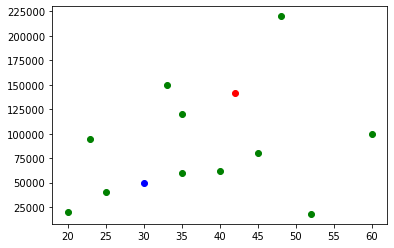

In [25]:
plt.scatter(X_train_unnormalized.iloc[:,:1], X_train_unnormalized.iloc[:,1:], c = 'green')
plt.scatter(X_test_unnormalized.iloc[:1,:1], X_test_unnormalized.iloc[:1,1:], c = 'red')
plt.scatter(X_test_unnormalized.iloc[1:,:1], X_test_unnormalized.iloc[1:,1:], c = 'blue')
plt.show()

In [26]:
test_point_1_n = X_test_normalized.iloc[:1,:] # Choosing the first line, therefore, the first point NORMALIZED
test_point_2_n = X_test_normalized.iloc[1:2,:] # Choosing the second line, therefore, the second point NORMALIZED
print(test_point_1_n,'\n', test_point_2_n,'\n')

test_point_1_s = X_test_standardized.iloc[:1,:] # Choosing the first line, therefore, the first point STANDARDIZED
test_point_2_s = X_test_standardized.iloc[1:2,:] # Choosing the second line, therefore, the second point STANDARDIZED
print(test_point_1_s,'\n', test_point_2_s,'\n')

test_point_1_u = X_test_unnormalized.iloc[:1,:] # Choosing the first line, therefore, the first point UNNORMALIZED
test_point_2_u = X_test_unnormalized.iloc[1:,:] # Choosing the second line, therefore, the second point UNNORMALIZED
print(test_point_1_u,'\n', test_point_2_u)

   Age  Loan
0  1.0   1.0 
    Age  Loan
1  0.0   0.0 

   Age  Loan
0  1.0   1.0 
    Age  Loan
1 -1.0  -1.0 

   Age    Loan
0   42  142000 
    Age   Loan
1   30  50000


### Possible results for point 1:

#### Normalized: 

In [27]:
for i in range(1,7):
    result_final1 = predict_regressor(X = X_train_normalized, y = y_train, test_row = test_point_1_n,k = 5, metric = i, floor = True)
    print(result_final1)

166
171
196
192
181
181


#### Standardized:

In [28]:
for i in range(1,7):
    result_final2 = predict_regressor(X = X_train_standardized, y = y_train, test_row = test_point_1_s,k = 5, metric = i, floor = True)
    print(result_final2)

166
171
196
192
181
181


#### Unnormalized:

In [29]:
for i in range(1,7):
    result_final3 = predict_regressor(X = X_train_unnormalized, y = y_train, test_row = X_test_unnormalized.iloc[:1,:],k = 5, metric = i, floor = True)
    print(result_final3)

166
171
196
192
181
181


### Possible results for point 2:

#### Normalized:

In [30]:
for i in range(1,7):
    result_final1_1 = predict_regressor(X = X_train_normalized, y = y_train, test_row = test_point_2_n,k = 5, metric = i, floor = True)
    print(result_final1_1)

166
171
196
192
181
181


#### Standardized:

In [31]:
for i in range(1,7):
    result_final2_1 = predict_regressor(X = X_train_standardized, y = y_train, test_row = test_point_2_s,k = 5, metric = i, floor = True)
    print(result_final2_1)

166
171
196
192
181
181


#### Unnormalized:

In [32]:
for i in range(1,7):
    result_final3_1 = predict_regressor(X = X_train_unnormalized, y = y_train, test_row = X_test_unnormalized.iloc[1:,:],k = 5, metric = i, floor = True)
    print(result_final3_1)

166
171
196
192
181
181


## 5. Conclusion:

### *We can conclude that an abnormal thing happened that is the same results in three tests using a different dataset, the standardized, normalized and unnormalized. These things can happen when we have values very similar in our dataset.*
- About our algorithm we can conclude that the better metric or function to be used is 3 and the amount of neighbors is 5.

### Values predicted:

* For the first point:

In [62]:
predict_regressor(X = X_train_normalized, y = y_train, test_row = test_point_1_n,k = 5, metric = 3, floor = True)

196

In [63]:
predict_regressor(X = X_train_standardized, y = y_train, test_row = test_point_1_s,k = 5, metric = 3, floor = True)

196

* For the second point:

In [64]:
predict_regressor(X = X_train_normalized, y = y_train, test_row = test_point_2_n,k = 5, metric = 3, floor = True)

196

In [65]:
predict_regressor(X = X_train_normalized, y = y_train, test_row = test_point_2_s,k = 5, metric = 3, floor = True)

196